In [1]:
import numpy as np

In [2]:
import os
import imageio

In [3]:
path='/dataset'

In [4]:
os.getcwd()
os.chdir('C:\\Users\\saurabh\\Desktop\\Blasteroid\\Practising AI\\CS231n\\dataset')

In [5]:
# get the train and test data
allImagesTrain=os.listdir('train')
print(len(allImagesTrain))

50000


Now allImageTrain has the names of all the images 

In [6]:
from scipy import misc

In [19]:
imageio.imread(os.path.join('C:\\Users\\saurabh\\Desktop\\Blasteroid\\Practising AI\\CS231n\\dataset\\train',allImagesTrain[0])).shape

(32, 32, 3)

Falltening these image we have

In [20]:
imageio.imread(os.path.join('C:\\Users\\saurabh\\Desktop\\Blasteroid\\Practising AI\\CS231n\\dataset\\train',allImagesTrain[0]))

Array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [42]:
print(allImagesTrain[:10])

['1.png', '10.png', '100.png', '1000.png', '10000.png', '10001.png', '10002.png', '10003.png', '10004.png', '10005.png']


In [36]:
traindata=[]
for i in allImagesTrain:
    traindata.append((imageio.imread(os.path.join('C:\\Users\\saurabh\\Desktop\\Blasteroid\\Practising AI\\CS231n\\dataset\\train',i))).reshape(32*32*3))

In [37]:
type(traindata)

list

In [38]:
traindata[0]

Array([ 59,  62,  63, ..., 123,  92,  72], dtype=uint8)

In [39]:
traindata=np.array(traindata)

In [40]:
traindata.shape

(50000, 3072)

Now we have all images that is 50K images, and each image is represented in one row

In [17]:
type(traindata)

numpy.ndarray

In [41]:
traindata[:2]

array([[ 59,  62,  63, ..., 123,  92,  72],
       [125, 125, 116, ..., 144, 116,  86]], dtype=uint8)

What we does in KNN is very simple and straight forward, we memorize each and every image, which means we must have all the 
Training images with us to do this, and we take two image and try to find distance between those two images, where difference between two images is the element wise absolute difference between all the pixels of the image and atlast sum of all these difference like 

[2,1,3,4,5,6] is a flattened image and [1,2,2,2,2,2] is another image than absolute difference is [1+1+1+2+3+4]=12, thus this is how we calculate difference between two images.

For a given image in test set, we calculate its distance from all training images, and this image is categorised to this nearest image

Forming the yLabels we have

In [43]:
import pandas as pd

In [47]:
type(os.getcwd())

str

In [48]:
yLabels=pd.read_csv(os.getcwd()+'\\trainLabels.csv')

In [49]:
yLabels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [72]:
yLabels[yLabels['id']==4]['label'].values[0] # this 4 would be replaced with imageName

str

In [78]:
allYLabels=[]
for i in allImagesTrain:
    i=i.replace('.png','')
    allYLabels.append(yLabels[yLabels['id']==int(i)]['label'].values[0])

In [79]:
allYLabels[:10]

['frog',
 'cat',
 'automobile',
 'dog',
 'dog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship']

Plotting some random images from the train set

In [80]:
import random

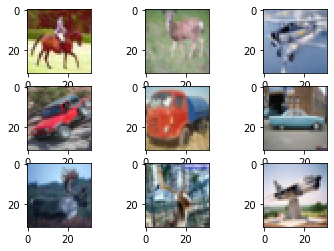

In [94]:
import matplotlib.pyplot as plt
temp=[]
for i in range (9):
    plt.subplot(330+i+1)
    plt.imshow(traindata[330+i+1].reshape(32,32,3))
    temp.append(allYLabels[330+i+1])



In [95]:
print(temp)

['horse', 'deer', 'airplane', 'automobile', 'truck', 'automobile', 'deer', 'deer', 'airplane']


### Splitting the data into validation and train set

Validation be 10K and 40K train and then we would take 10K test images and publish our answer

Randomly splitting the dataset

In [110]:
type(allYLabels)

list

In [112]:
# coverting Ylabels into numpy of strings
allYLabels=np.array(allYLabels)

In [113]:
type(allYLabels)

numpy.ndarray

## Save allImages and their corresponding labels

allYlabels have corresponding labels and traindata has corresponding Image in flattened form

In [114]:
from sklearn.model_selection import train_test_split
xTrain, xVal, yTrain, yVal = train_test_split(traindata, allYLabels, test_size=0.20, random_state=42)

In [115]:
xTrain.shape, xVal.shape, len(yTrain), len(yVal)

((40000, 3072), (10000, 3072), 40000, 10000)

In [116]:
class KKNImageClassifier:
#     This take x dataset which has n images and each image is faltened and y as label which is may be string or integer
    def __init__(self,x,y):
        pass
    
    def train(self,x,y):
        self.xTrn=x
        self.yTrn=y
    
    def predict(self,xTest):
        size=xTest.shape[0]
        predValues=np.zeros(size,self.yTrn.dtype)
        # iterate over all the train data and find the nearest image as per distance
        for i in range(size):
            distance=self.xTrn-xTest[i,:]
            nearestImageIndex=np.argmin(distance)
            predValues[i]=self.yTrn[nearestImageIndex]
    
        return predValues

This method is too slow, for 1000 images in training dataset and each image of 100X100 then it would take 10^7 time, thus training time is O(1) and test time for 1 image O(n*width*height of each image)

Many methods exist for fast / approximate nearest neighbor (beyond the scope of 231N!) and below is one example

https://github.com/facebookresearch/faiss


Instead of copying label from nearest label we can do majority vote

Distance metric like manhattan distance or eucledian distance can be used

Playground to see how the hyperparameter tuning changes the boundary of KNN neighbour

http://vision.stanford.edu/teaching/cs231n-demos/knn/

KNN is very slow at training time and distance difference between image is not a good metric and not at all informative

Thus KNN is never used to classify the image

Take CIFAR 10 dataset and calculate the accuaracy

If you ran this code, you would see that this classifier only achieves 38.6% on CIFAR-10. That’s more impressive than guessing at random (which would give 10% accuracy since there are 10 classes), but nowhere near human performance (which is estimated at about 94%) or near state-of-the-art Convolutional Neural Networks that achieve about 95%, matching human accuracy (see the leaderboard of a recent Kaggle competition on CIFAR-10).

### Assignment Train, Validate and Test the CIFAR 10 with KNN

Performing 1NN as we are labelling nearest image as our label

**Modify KNN function such that we give it K as parameter and it returns us prediction with that K**

With help of this we would be able to tune our K parameter, and then finally perform on test set

In [117]:
KNNcifar10=KKNImageClassifier(xTrain,yTrain)

In [118]:
KNNcifar10.train(xTrain,yTrain)

It would take 20Hr to do so, as per my calculations

In [ ]:
%time predict=KNNcifar10.predict(xVal)

In [ ]:
[True,False,True,False].count

In [ ]:
print((((predict==yVal).count)/len(yVal))*100)